# 농업 데이터 정재/가공/분석/모델링 교육

* toc : true
* branch: master
* badges: true
* comments: true
* author: 이강철
* categories: [R]
* published : true
* hide : false

> youtube: https://www.youtube.com/playlist?list=PLXpKZhw37cVImM7bgCVQRjiom2Ae6T7Ei

## Introduction

* 이름 : 이강철

* 회사 및 직책 : (주)좋은정보기술 주임

* mail : rkdcjf8232@gmail.com

* 사용언어 : R

[R install](https://iamoverthemoon.tistory.com/64)

* 교육 자료 : R for data science, 논문, ISLR 등등

## 1. 데이터 전처리(tidyverse)

* 데이터 전처리는 전체 분석 프로세스에서 가장 많은 시간이 소요되는 작업

* 또한, 전처리 과정이 잘못 수행될 시에 분석 결과가 과대 또는 과소 해석으로 이루어질 수 있다.

* 실제 분석에서는 R의 벡터, 리스트 형태가 아닌 `csv,xlsx` 등의 파일을 데이터프레임 형태로 읽어들여 분석을 수행하기 때문에 데이터 프레임의 초점을 둘 것임

왜 tidyverse냐?

* tidyverse = dplyr + ggplot2 + $\dots$

* 또한, 데이터 로드 및 전처리 수행시 R의 기존 내장 함수들보다 빠른 속도를 제공한다.

* pip(%>%) 연선자
    * 단축키 :  ctrl + shift + m 
    * 위에 단축키를 사용시 데이터셋을 말로 이어말하듯 전처리가 가능하다.

`1`. 데이터 로드

* 데이터 출처 : [농산물유통정보 KAMIS](https://www.kamis.or.kr/customer/main/main.do)

* 해당 데이터는  2022년 1월 3일부터 2022년 6월 23일까지의 **"토마토와 딸기 도매가격"**

* 서울, 부산, 대구, 광주, 대전 지역의 도매가격이며 1kg당 단위 가격이다.

In [92]:
#install.packages("tidyverse")
#install.packages("nycflights13")  # if not installed yet

library(tidyverse)

In [93]:
setwd("C:/Users/git/Desktop/업무/20220624(업무인수인계)")

In [94]:
data <- read_csv("total.csv")

Rows: 580 Columns: 4
-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr (2): 지역, 날짜
dbl (2): 토마토, 딸기

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [95]:
head(data)

지역,날짜,토마토,딸기
<chr>,<chr>,<dbl>,<dbl>
서울,01월 03일,4950,12375
부산,01월 03일,4000,10000
대구,01월 03일,4400,11000
광주,01월 03일,4720,11800
대전,01월 03일,4630,11575
서울,01월 04일,4950,12375


### select & fliter

* select : 조건에 맞는 열 선택

* filter : 조건에 맞는 행을 선택

철수 : **"난 지역별, 날짜별 토마토의 도매가격을 알고 싶어"**

In [96]:
data %>% 
    select(지역, 날짜, 토마토) %>% head()

지역,날짜,토마토
<chr>,<chr>,<dbl>
서울,01월 03일,4950
부산,01월 03일,4000
대구,01월 03일,4400
광주,01월 03일,4720
대전,01월 03일,4630
서울,01월 04일,4950


영희 : **"근데 서울의 인구수가 많으니까 서울 지역을 대표로 선택해서 보는 건 어때?"**

In [16]:
data %>% 
    select(지역, 날짜, 토마토) %>% 
                            filter(지역=="서울") %>% head()

지역,날짜,토마토
<chr>,<chr>,<dbl>
서울,01월 03일,24750
서울,01월 04일,24750
서울,01월 05일,24750
서울,01월 06일,24750
서울,01월 07일,22850
서울,01월 10일,20100


### mutate

`-` 수식이나 문자표현식을 이용해 새로운 변수를 만드는 함수

> example 1 : (토마토 + 딸기) $\div$ 2$\quad\to\quad $ 평균가격 변수 생성

In [97]:
data %>% 
    mutate(평균가격 =(토마토 + 딸기) / 2 ) %>% head()

지역,날짜,토마토,딸기,평균가격
<chr>,<chr>,<dbl>,<dbl>,<dbl>
서울,01월 03일,4950,12375,8662.5
부산,01월 03일,4000,10000,7000.0
대구,01월 03일,4400,11000,7700.0
광주,01월 03일,4720,11800,8260.0
대전,01월 03일,4630,11575,8102.5
서울,01월 04일,4950,12375,8662.5


### groupyby + summarize

* 데이터의 그룹별 요약 통계량을 통해 그룹별 데이터의 형태를 파악할 수 있다.

* 현재 `iris` 데이터의 경우 총 3가지의 종으로 나누어져 있다.

`1` 각 그룹별 빈도수 세기

In [98]:
data %>% 
        group_by(지역) %>% count()

지역,n
<chr>,<int>
광주,116
대구,116
대전,116
부산,116
서울,116


`2` 각 지역별 토마토와 채소 평균가격 산출

In [99]:
data %>% group_by(지역) %>% 
                    summarize(mean_tomato = mean(토마토),
                              mean_strawberry = mean(딸기))

지역,mean_tomato,mean_strawberry
<chr>,<dbl>,<dbl>
광주,3285.000,8212.500
대구,3370.690,8426.724
대전,3386.810,8467.026
부산,3189.310,7973.276
서울,3240.603,8101.509


### Join

* 보통의 데이터는 한 가지의 데이터 프레임이 아닌 다수의 데이터 프레임을 결합하여 형성한다.

* 이러한 것을 데이터 프레임들을 **"join"** 한다고 하며 이 경우 각 데이터 프레임의 `key` 값을 이용한다.

In [100]:
data1 <- data %>% select(1,2,3)
names(data1)[1:2] <- c("지역1","날짜1")
data2 <- data %>% select(1,2,4)
names(data2)[1:2] <- c("지역2","날짜2")

In [101]:
head(data1)

지역1,날짜1,토마토
<chr>,<chr>,<dbl>
서울,01월 03일,4950
부산,01월 03일,4000
대구,01월 03일,4400
광주,01월 03일,4720
대전,01월 03일,4630
서울,01월 04일,4950


In [102]:
head(data2)

지역2,날짜2,딸기
<chr>,<chr>,<dbl>
서울,01월 03일,12375
부산,01월 03일,10000
대구,01월 03일,11000
광주,01월 03일,11800
대전,01월 03일,11575
서울,01월 04일,12375


In [111]:
data1 %>% 
        left_join(data2,by=c("지역1"="지역2","날짜1"="날짜2")) %>% head()

지역1,날짜1,토마토,딸기
<chr>,<chr>,<dbl>,<dbl>
서울,01월 03일,4950,12375
부산,01월 03일,4000,10000
대구,01월 03일,4400,11000
광주,01월 03일,4720,11800
대전,01월 03일,4630,11575
서울,01월 04일,4950,12375


***

## 2. 데이터 분석

### 일표본 T 검정

* 개념 : 단일모집단에서 관심이 있는 연속형 벼수의 평균값을 특정기준값과 비교하고자 할 때 사용


In [104]:
mean(data$`토마토`)

[1] 3294.483

> example : 토마토 평균 도매가격이 `3,200` 인지 검정한다.

$$H_0 : \mu = 3,200 \quad H_1 :  \mu \neq 3,200$$

In [105]:
t.test(data$`토마토`,mu=3200,alternative= "two.sided")


	One Sample t-test

data:  data$토마토
t = 3.0602, df = 579, p-value = 0.002314
alternative hypothesis: true mean is not equal to 3200
95 percent confidence interval:
 3233.844 3355.122
sample estimates:
mean of x 
 3294.483 


* 검정통계량의 근거한 p-value 값을 보았을 때 귀무가설을 기각한다. **즉, 토마토의 평균 도매가격은 3,200원이 아니다.**

### 대응표본 T-검정

* 단일모집단에 대해 두번의 처리를 가했을 때, 두 개의 처리에 따른 평균 차이를 비교하고자 할 때 사용

* 표본 내의 개체들에 대해서 두 번의 측정을 실시  즉, 관측값들은 서로 독립적이지 않고 쌍으로 이루어져 있다.

* 상황 가정 : 코로나로 인해 토마토의 도매가격이 kg당 200원씩 상승했다.

$$H_0 : \mu_x = \mu_y,\quad H_1 = \text{not}\,\, H_0$$

$$H_0: \mu_x - \mu_y= 0 \quad H_1 : \text{not} \,\, H_0$$

In [106]:
temp <- data
temp <- temp %>% mutate(after_t = 토마토 + 200) %>% select(1,3,5)
names(temp)[2:3] <- c("토마토_before","토마토_after")
temp %>% head()

지역,토마토_before,토마토_after
<chr>,<dbl>,<dbl>
서울,4950,5150
부산,4000,4200
대구,4400,4600
광주,4720,4920
대전,4630,4830
서울,4950,5150


In [107]:
t.test(temp$`토마토_before`, temp$`토마토_after`,paird=T)


	Welch Two Sample t-test

data:  temp$토마토_before and temp$토마토_after
t = -4.5806, df = 1158, p-value = 5.139e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -285.667 -114.333
sample estimates:
mean of x mean of y 
 3294.483  3494.483 


* 검정통계량의 근거한 p-value 값을 보았을 때 귀무가설을 기각한다. **즉, 코로나 이후 토마토 도매가격의 평균 차이가 있다.**

### 독립표본 T검정

* 두 개의 독립된 모집단의 평균을 비교하고자 할 때 사용하는 검정 방법

* 토마토와 딸기 kg당 도매가격의 유의미한 차이가 있는지 확인해보자

In [110]:
t.test(data$`토마토`,data$`딸기`)


	Welch Two Sample t-test

data:  data$토마토 and data$딸기
t = -59.445, df = 759.66, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5104.919 -4778.529
sample estimates:
mean of x mean of y 
 3294.483  8236.207 


* 검정통계량의 근거한 p-value 값을 보았을 때 귀무가설을 기각한다. **즉, 딸기와 토마토 평균 도매가격의 차이는 유의미하다.**

***

### 일원배치 분산분석

* T-검정과 달리 두 개 이상의 다수 집단 간 평균을 비교하는 통계분석 방법

* 반응값에 대한 하나의 범주형 변수(지역)의 영향을 알아보기 위해 사용한다.

* 지역별 토마토 도매가격의 평군차이가 있는지 확인해보자

In [112]:
result_1 <- aov(토마토~지역,data)

In [114]:
summary(result_1)

             Df    Sum Sq Mean Sq F value Pr(>F)
지역          4   3292778  823194   1.494  0.202
Residuals   575 316817167  550986               

* F-통계량을 보았을 때 지역별 토마토 평균 도매가격의 차이는 존재하지 않는다.

### 상관분석

* 두 변수간 어느 정도의 상관성이 있는지 확인하는 분석

* 상관분석에서 산출된 상관계수는 두 변수간의 인과관계를 설명해주진 않는다.

* 단지, 두 변수간 어느 정도의 연관성이 있는지 확인하는 척도이다.

* 현재 데이터의 날짜가 1월부터 6월까지이므로 점차 기온이 올라간다는 가정하에 임시 기온 데이터를 생성하고 강수량 데이터를 추가

In [188]:
#collapse-hide
te <- 1:580
te <- (te-1)/(580-1)*33
te <- te + rnorm(580,mean=4,sd=2)

data$온도  <- te

rain  <- rnorm(580,10,0.2)

data$강수량 <- rain

In [189]:
cor(data %>% select(3,5,6))

,토마토,온도,강수량
토마토,1.00000000,-0.88597295,0.07388668
온도,-0.88597295,1.00000000,-0.05656151
강수량,0.07388668,-0.05656151,1.00000000


In [190]:
cor(data %>% select(4:6))

,딸기,온도,강수량
딸기,1.00000000,-0.88597295,0.07388668
온도,-0.88597295,1.00000000,-0.05656151
강수량,0.07388668,-0.05656151,1.00000000


### 회귀분석

* ‘회귀’라는 단어는 키가 큰 아버지의 아들 키가 세대를 거치면서 모집단의 평균키로 회귀한다는 발견에서 유래됨

* 변수들간의 관계를 모형화하고 조사하는 통계적 기법


$$y= \beta_0 + \beta_1x_1+ \dots \beta_px_p$$

* $x$ : 독립변수, $y$ : 목표변수(예측변수)

`-` 예제 : 온도와 강수량을 통해 토마토의 도매가격을 예측하는 모형 적합

In [191]:
fit1 <- lm(토마토~온도 + 강수량,data)
summary(fit1)


Call:
lm(formula = 토마토 ~ 온도 + 강수량, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1055.91  -204.89     6.26   224.81   878.45 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3831.335    676.771   5.661 2.37e-08 ***
온도         -66.744      1.457 -45.809  < 2e-16 ***
강수량        83.245     67.400   1.235    0.217    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 345 on 577 degrees of freedom
Multiple R-squared:  0.7855,	Adjusted R-squared:  0.7848 
F-statistic:  1057 on 2 and 577 DF,  p-value: < 2.2e-16


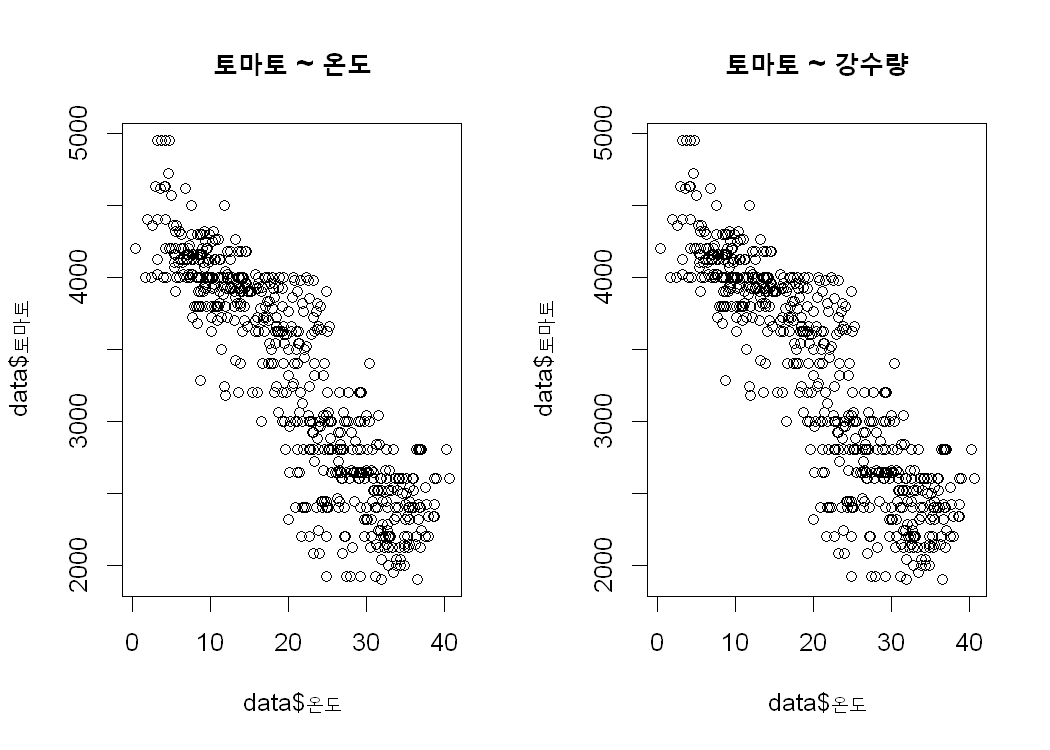

In [192]:
#collapse-hide
options(repr.plot.res=150,repr.plot.height=5,repr.plot.weight=10)
par(mfrow= c(1,2))
plot(data$온도, data$토마토,main = "토마토 ~ 온도", xlab=NULL,ylab=NULL)
plot(data$온도, data$토마토,main = "토마토 ~ 강수량", xlab=NULL,ylab=NULL)

#### 모형진단

`1` 회귀모형의 유의성 파악 $\to$  F통계량에 근거한 p-value 값 살펴보기

In [193]:
summary(fit1)


Call:
lm(formula = 토마토 ~ 온도 + 강수량, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1055.91  -204.89     6.26   224.81   878.45 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3831.335    676.771   5.661 2.37e-08 ***
온도         -66.744      1.457 -45.809  < 2e-16 ***
강수량        83.245     67.400   1.235    0.217    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 345 on 577 degrees of freedom
Multiple R-squared:  0.7855,	Adjusted R-squared:  0.7848 
F-statistic:  1057 on 2 and 577 DF,  p-value: < 2.2e-16


`2` 개별 회귀계수의 유의성파악 $\to$ t통계량에 근거한 p-value 값 살펴보기

`3` 결정계수 및 수정된 결정계수값 확인

`4` 잔차 진단

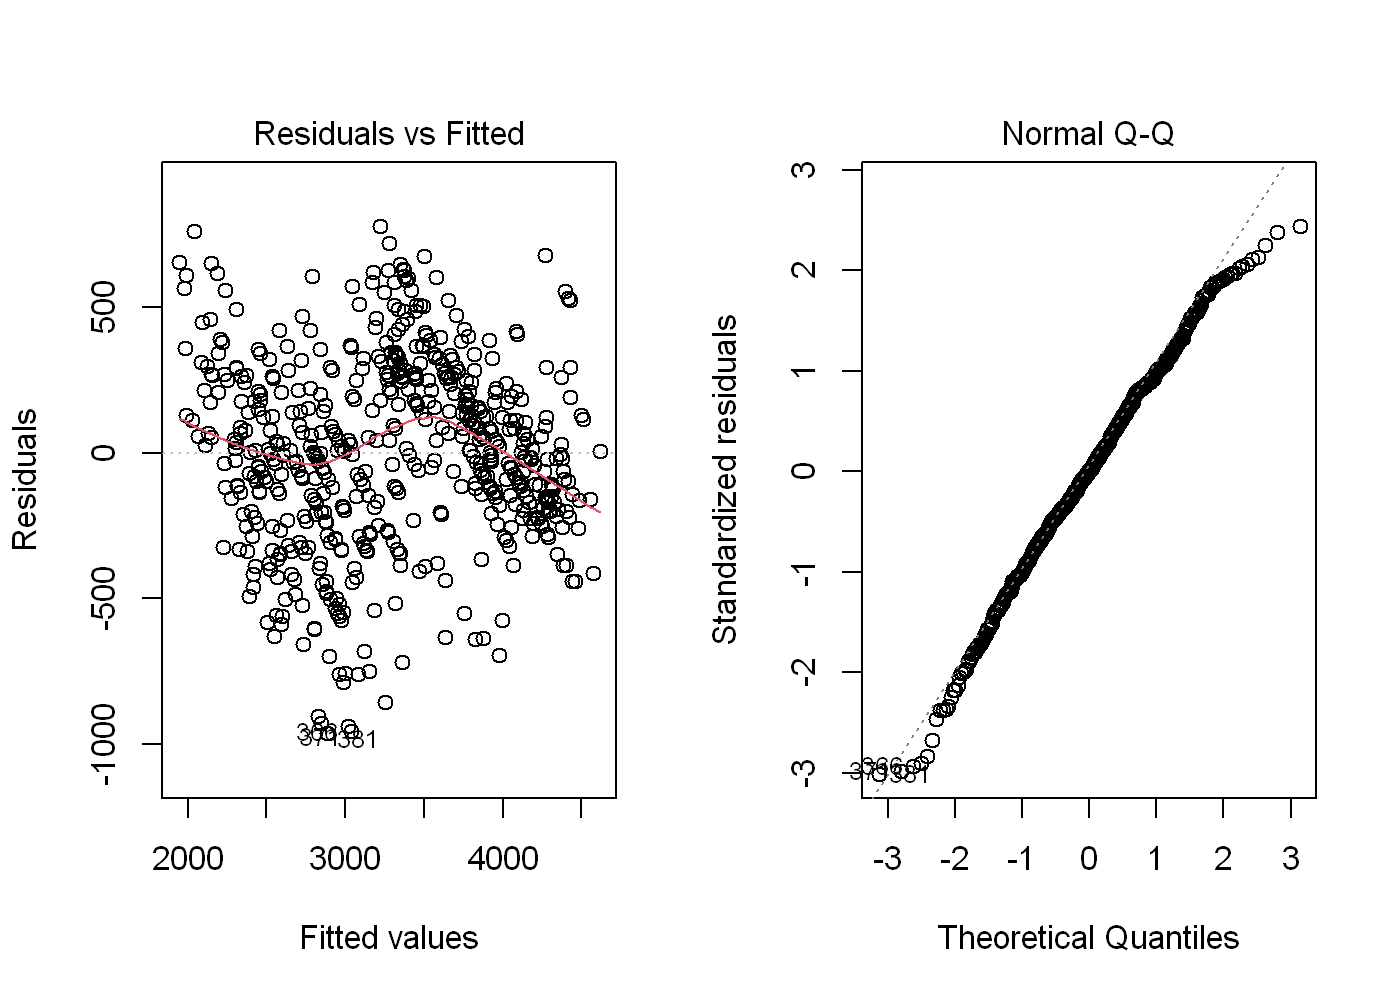

In [187]:
options(repr.plot.res=200)
par(mfrow=c(1,2))
plot(fit1,1)
plot(fit1,2)